<a href="https://colab.research.google.com/github/Aarnav-P/Topology-in-SCS/blob/main/Week_1_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 1D OBC Nearest Neighbour

To start with, let's write the code for a 1D non-periodic (open boundary conditions, OBC) lattice with only 1 sublattice (A) using the nearest-neighbour hamiltonian

$$
H = -t \sum_n \left( c_n^\dagger c_{n+1} + c_{n+1}^\dagger c_n \right)
$$

Here, t is the matrix element associated with hopping from the $n^{th}$ to the  $(n+1)^{th}$ orbital (and vice versa), while ($c_i, c^\dagger_i$) are the destruction/creation operators which add and remove particles from the $i^{th}$ orbital.

From now on let's work in energy units of the hopping amplitude. The matrix corresponding to this Hamiltonian for a length N chain (working in the "site basis" where $|0\rangle$ is corresponds to the particle being localised to the first lattice site)

$$
H =
\begin{pmatrix}
0 & -1 & 0 & \cdots & 0 \\
-1 & 0 & -1 & \cdots & 0 \\
0 & -1 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -1 \\
0 & 0 & 0 & -1 & 0
\end{pmatrix}_{N \times N}
$$

To get an energy spectrum, we must diagonalise this and read off the eigenvalues



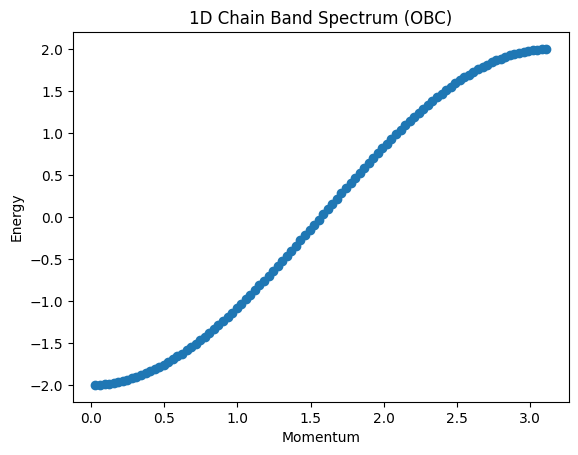

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

def hamiltonian_OBC(N):
  H = np.zeros((N, N))

  for i in range(N-1):
    H[i, i+1] = -1
    H[i+1, i] = -1

  return H

eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_OBC(N))

k = np.arange(1, N+1) * np.pi / (N+1)

plt.plot(k, eigenvalues, 'o-')
plt.xlabel('Momentum')
plt.ylabel('Energy')
plt.title('1D Chain Band Spectrum (OBC)')
plt.show()


This looks like a cosine spectrum. We can derive this analytically by considering the $n^{th}$ row in the matrix:

$$(H\psi)_n=-\psi(n+1)-\psi(n-1) = E_n\psi(n)$$

This is a linear recurrence relation. Using the ansatz:
$$\psi(n) = Acos(nk) + Bsin(nk)$$

And the OBC:
$$\psi(0) = \psi(N) = 0$$

We end up with:
$$\psi(n) = Bsin(kn), \quad k = \frac{m \pi}{N+1}, \quad  m = 1,\dots,N$$

So subbing this into the $n^{th}$ row equation, and rearranging for $E_n$:

$$E_m = -2 t \cos\left( \frac{m \pi}{N+1} \right)$$

Which is exactly what we find in the energy spectrum.

# 2) 1D PBC Nearest neighbour

Only a small change here, we include in the matrix -1 terms in the top right and bottom left indices to indicate that site 0 can travel to site N:

$$
H =
\begin{pmatrix}
0 & -1 & 0 & \cdots & -1 \\
-1 & 0 & -1 & \cdots & 0 \\
0 & -1 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -1 \\
-1 & 0 & 0 & -1 & 0
\end{pmatrix}_{N \times N}
$$

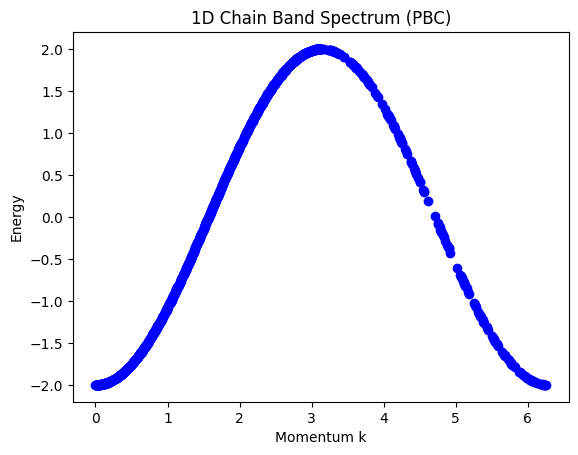

In [ ]:
N = 1000

def hamiltonian_PBC(N):
  H = np.zeros((N, N))

  for i in range(N-1):
    H[i, i+1] = -1
    H[i+1, i] = -1

  H[0, -1] = -1
  H[-1, 0] = -1

  return H

eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_PBC(N))
'''
This function organises the eigenvalues in ascending order rather than according
to each momentum (meaning periodicity gets ignored and we can't just plot the
spectrum as-is
'''
k_values = 2 * np.pi * np.arange(N) / N #According to the theory, what we expect this relation
assigned_k = []

'''
Take the fourier transform of the eigenvectors and identify the peak momentum
component (of which there should only be 1) and then assign it to the eigenvalue
'''

for vec in eigenvectors.T:
    ft = np.fft.fft(vec)
    idx = np.argmax(np.abs(ft))
    k = k_values[idx]
    assigned_k.append(k)

assigned_k = np.array(assigned_k)
plt.scatter(assigned_k, eigenvalues, color='blue')
plt.xlabel('Momentum k')
plt.ylabel('Energy')
plt.title('1D Chain Band Spectrum (PBC)')
plt.show()

Analytically, the periodic boundary conditions mean the system is translationally invariant, so the eigenstates are plane waves:
$$\psi_k(n) = \frac{1}{\sqrt{N}}e^{ikn}, \quad n = 1, 2, 3, ... N$$
Putting in the PBCs this time we find k to be quantised as:
$$k = \frac{2m\pi}{N}, \quad m = 0, 1, 2, ... N-1$$
Plugging these expressions into the $n^{th}$ row again we find:
$$E_m = - 2cos(k) = - 2cos\left(\frac{2m\pi}{N}\right)$$

Just as we see in our plot. This degeneracy in energy is due to $E(k) = E(-k)$, though in our case we have k centred around π rather than 0 (just from defining m as totally positive integers and k having a factor of 2).

## Constructing the 2D PBC system:

From the tight-binding Hamiltonian we have already seen in past courses how periodic boundary conditions allow us to use Bloch's theorem, such that we can write $H(\vec{k})$ for each crystal momentum $\vec{k}$.
If the unit cell contains $2$ orbitals with positions $\vec{r}_i,\vec{r}_j$, such as in graphene, then the matrix elements are
\begin{equation}
    H_{ij}(\vec{k}) = \sum_{\vec{R}} t_{ij}(\vec{R})
    \exp\!\left[i\vec{k}\cdot(\vec{r}_j - \vec{r}_i + \vec{R})\right],
\end{equation}
where $t_{ij}$ denotes the hopping amplitude from orbital $j$ in the reference
cell to orbital $i$ in the cell displaced by the lattice vector $\vec{R}$. For computational purposes, we then restrict this to nearest neighbours. We can code this somewhat straightforwardly for the simple case of a square lattice, where $t_{ij}=t_{ji}$ and there are no sublattices.

We can first do a bit of theory work to see what we expect when following this procedure. If we were to construct our Hamiltonian matrix using our sum, we would effectively be computing for the square lattice a 1x1 matrix. After this, we will look at the structure of graphene, which contains sublattices, and will therefore be more itneresting.

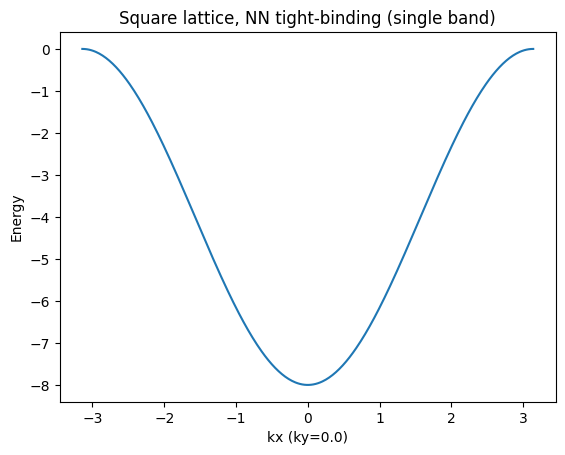

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def H_of_k(kvec, cell_positions, hoppings):
    """
    cell_positions: list of 2-vectors r_i inside unit cell
    hoppings: list of tuples (i, j, (n1,n2), t_ij)
      meaning hopping from orbital j in unit cell R=0 to orbital i in unit cell R=(n1,n2)
      Real-space vector = r_j - r_i + n1*a1 + n2*a2  (we pass full vector via Rvec in hoppings)
    """
    N = len(cell_positions)
    H = np.zeros((N, N), dtype=complex)
    for (i, j, Rvec, t) in hoppings:
        # make phase: k·( r_j - r_i + Rvec )
        delta = cell_positions[j] - cell_positions[i] + np.array(Rvec)
        phase = np.exp(1j * np.dot(kvec, delta))
        H[i, j] += t * phase
    # add Hermitian symmetry because hoppings are specified only one way
    # This completes the hamiltonian but in an easier way than specifying everything
    # If we add 'fixed one way and PBC the other way' we might then use something different here
    # which is why i've done it like this.
    H = (H + H.conj().T)
    return H

def square_lattice(Nk=200, t=-1.0):
    a1 = np.array([1.0, 0.0]) # lattice vectors
    a2 = np.array([0.0, 1.0]) # unit length

    cell_pos = [np.array([0.0, 0.0])] # no substructure

    # hoppings: 4 n.n.
    hoppings = []
    neighbors = [(1,0),(-1,0),(0,1),(0,-1)]
    for R in neighbors:
        hoppings.append((0, 0, R, t))   # i=0, j=0, R=(n1,n2)
    # i and j are zero here because there is no substructure
    # emphasising this because tracking this is actually useful later so it is
    # introduced now, even if it looks a bit unnecessary for the square

    # For 1st BZ, generate (kx,ky) values and get band energies
    kxs = np.linspace(-np.pi, np.pi, Nk)
    kys = np.linspace(-np.pi, np.pi, Nk)  # unfortunate var name
    energies = np.zeros((Nk, Nk))
    for ix,kx in enumerate(kxs):
        for iy,ky in enumerate(kys):
            H = H_of_k(np.array([kx, ky]), cell_pos, hoppings)
            eigenvals = np.linalg.eigvalsh(H)
            energies[ix, iy] = eigenvals[0].real
    #  plot of 1D cut along kx with ky=0
    kcut = np.linspace(-np.pi, np.pi, 401)
    band = []
    cut_val = 0.0
    for kx in kcut:
        H = H_of_k(np.array([kx, cut_val]), cell_pos, hoppings)
        band.append(np.linalg.eigvalsh(H)[0].real)
    plt.figure()
    plt.plot(kcut, band)
    plt.xlabel(f'kx (ky={cut_val})')
    plt.ylabel('Energy')
    plt.title('Square lattice, NN tight-binding (single band)')
    plt.show()

square_lattice()


We next extend this model to the honeycomb lattice structure of graphene, to be subsequently extended to include next nearest neighbours and a spin-orbit interaction term. The lattice is defined as follows:

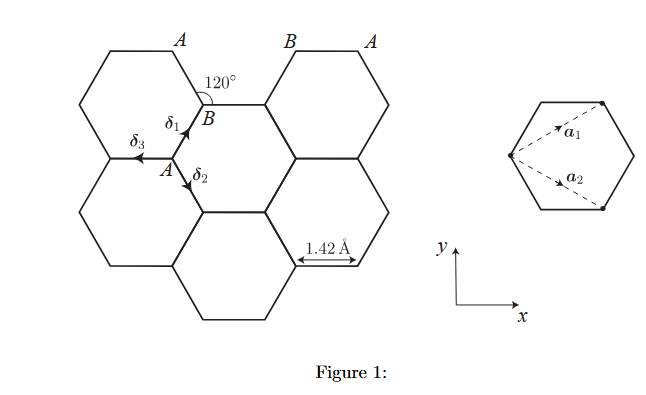
Graphene consists of two sublattices of A and B atoms. In order the calculate the band structure of such a system - with periodic boundary conditions (PBCs) - we will be interested in the interactions of these sublattices. Due to the translational symmetries of the bulk, we apply the Bloch theorem, and state:

\begin{align}
    |{\phi_A}\rangle & = \frac{1}{\sqrt{N}}\sum_je^{ik\vec{R_j}}|{\phi_{A_j}}\rangle \\
    |{\phi_B}\rangle & = \frac{1}{\sqrt{N}}\sum_je^{ik\vec{R_j}}|{\phi_{B_j}}\rangle.
\end{align}

A hopping potential, $t$, is defined such that $\langle\phi_{A_i}|\hat{H}|\phi_{B_i}\rangle = -t$, given that $A_i, B_i$ are nearest neighbours. For the same reason, the hopping amplitude from $A$ to $A$ and $B$ to $B$ is zero. We could define a potential this way instead if we were to consider, for example, a square 2D lattice with no sublattice structure. This only reduces our Hamiltonian to a 1x1 matrix, instead of being 2x2.

The 2x2 Hamiltonian then with n.n. interactions (to begin with) looks like:

\begin{equation}
    \hat{H}(\vec{k}) =
    \begin{pmatrix}
        0 & \langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle \\
        \langle{\phi_{B_i}}|\hat{H}|{\phi_{A_i}}\rangle & 0
    \end{pmatrix}.
\end{equation}

where each term is evaluated using \begin{equation}
    H_{ij}(\vec{k}) = \sum_{\vec{R}} t_{ij}(\vec{R})
    \exp\!\left[i\vec{k}\cdot(\vec{r}_j - \vec{r}_i + \vec{R})\right],
\end{equation}

and the lead diagonal terms are empty as all n.n's for A/B are of B/A respectively. Naturally then, if we include n.n.n's the code simply accomodates the new $\vec{R}$ and we compute instead the eigenvalues of \begin{equation}
    \hat{H}(\vec{k}) =
    \begin{pmatrix}
        \langle{\phi_{A_i}}|\hat{H}|{\phi_{A_j}}\rangle & \langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle \\
        \langle{\phi_{B_i}}|\hat{H}|{\phi_{A_i}}\rangle & \langle{\phi_{B_i}}|\hat{H}|{\phi_{B_j}}\rangle
    \end{pmatrix}.
\end{equation}

This can be rewritten a little more concisely as it turns out that the leading diagonal terms in graphene are identical, and the off diagonal terms are simply conjugates of each other. If we call the nnn energy $\alpha(\vec{k})$ and the nn energy $\Delta(\vec{k})$ then

\begin{equation}
    \hat{H}(\vec{k}) =
    \begin{pmatrix}
        \epsilon(\vec{k}) & \Delta(\vec{k}) \\
        \Delta^*(\vec{k}) & \epsilon(\vec{k})
    \end{pmatrix}.
\end{equation}

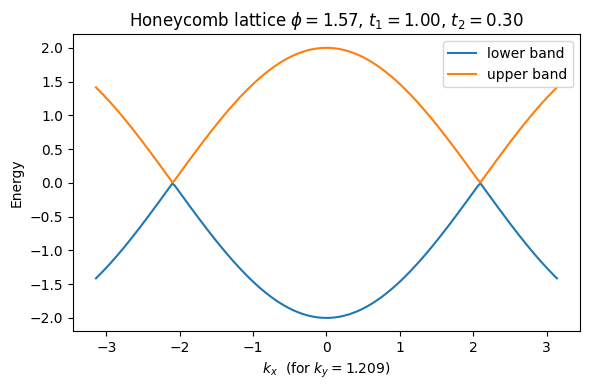

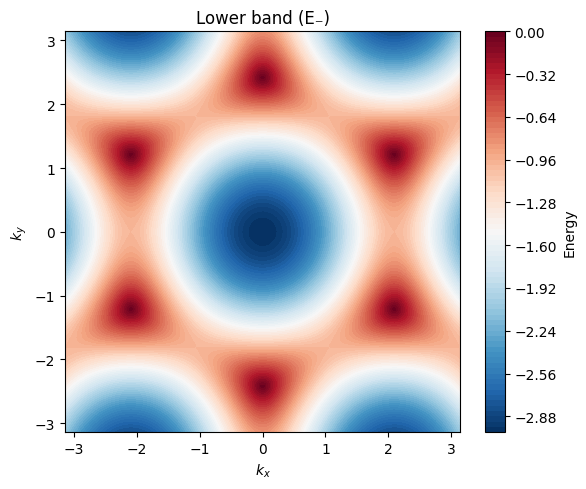

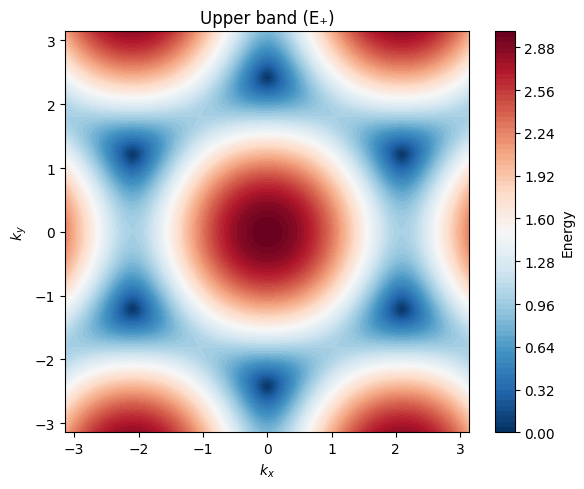

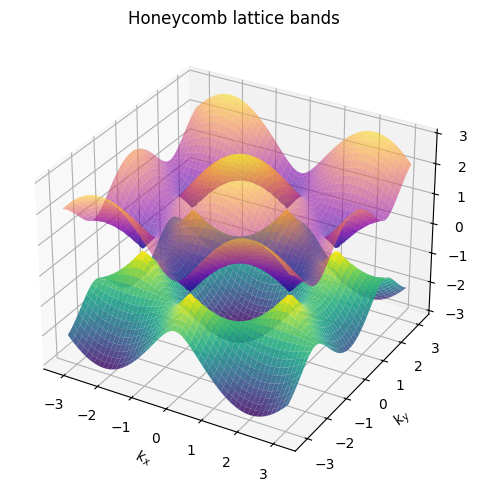

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# %% DEFINE LATTICE
# Pauli matrices
sigma0 = np.array([[1.0, 0.0],
                   [0.0, 1.0]])
sigma1 = np.array([[0.0, 1.0],
                   [1.0, 0.0]])
sigma2 = np.array([[0.0, -1.0j],
                   [1.0j,  0.0]])
sigma3 = np.array([[1.0, 0.0],
                   [0.0, -1.0]])

# Primitive vectors
a1 = np.array([1.5, np.sqrt(3)/2.0])
a2 = np.array([1.5, -np.sqrt(3)/2.0])

# nearest-neighbor vectors (a_i) connecting A -> B
delta1 = np.array([-1.0, 0.0])
delta2 = np.array([0.5, -np.sqrt(3)/2])
delta3 = np.array([0.5,  np.sqrt(3)/2])

nn = [delta1,delta2,delta3]

# next-nearest-neighbor vectors (b_i) on the same sublattice
nnn = [
    nn[2] - nn[0],  # delta3 - delta1
    nn[0] - nn[1],  # delta1 - delta2
    nn[1] - nn[2],   # delta2 - delta3
    -(nn[2] - nn[0]),  # mirrors
    -(nn[0] - nn[1]),
    -(nn[1] - nn[2]),

]

# %% DEFINE FUNCTIONS
def H_of_k(kvec, t1=1.0, t2=0.2, phi=np.pi/2, M=0.0):
    """
    Return the 2x2 Bloch Hamiltonian H(k) for a given k-vector.

    Parameters
    ----------
    kvec : array-like, shape (2,)
        Crystal momentum (kx, ky).
    t1 : float
        Nearest-neighbour hopping amplitude (real).
    t2 : float
        Next-nearest-neighbour hopping amplitude (real).
    phi : float
        Complex phase for the n.n.n. hopping (real).
    M : float
        On-site mass (staggered potential).

    Returns
    -------
    H : ndarray, shape (2,2), dtype complex
        The Hamiltonian matrix at kvec.
    """
    k = np.asarray(kvec, dtype=float)

    # sums over nearest neighbors (a_i)
    cos_ka = sum(np.cos(np.dot(k, ai)) for ai in nn)
    sin_ka = sum(np.sin(np.dot(k, ai)) for ai in nn)

    # sums over next-nearest neighbors (b_i)
    cos_kb = sum(np.cos(np.dot(k, bi)) for bi in nnn)
    sin_kb = sum(np.sin(np.dot(k, bi)) for bi in nnn)

    # scalar prefactors
    d0 = 2.0 * t2 * np.cos(phi) * cos_kb
    d1 = t1 * cos_ka
    d2 = t1 * sin_ka
    d3 = M - 2.0 * t2 * np.sin(phi) * sin_kb

    # combine
    H = (d0*sigma0
         + d1*sigma1
         + d2*sigma2
         + d3*sigma3)

    return H

# Convenience: eigenvalues and eigenvectors
def bands_at_k(kvec, **hparams):
    """Return eigenvalues (sorted ascending) and eigenvectors of H(k)."""
    H = H_of_k(kvec, **hparams)
    eigvals, eigvecs = np.linalg.eigh(H)
    # eigvals ascending; eigvecs columns correspond to eigenvectors
    return eigvals, eigvecs

# Optional: compute bands on a k-grid (mesh) and return eigenvalues arrays
def bands_on_mesh(kx_array, ky_array, **hparams):
    """
    Compute two bands on the grid defined by kx_array x ky_array.
    Returns eigs shape (2, len(kx), len(ky)) with eigs[0] = lower band, eigs[1] = upper band.
    """
    kx = np.asarray(kx_array)
    ky = np.asarray(ky_array)
    NX = kx.size
    NY = ky.size
    eigs = np.zeros((2, NX, NY), dtype=float)
    for i, kxi in enumerate(kx):
        for j, kyj in enumerate(ky):
            vals, _ = bands_at_k([kxi, kyj], **hparams)
            eigs[:, i, j] = np.sort(np.real(vals))
    return eigs

# %% BANDSTRUCTURE AND FULL BZ SAMPLING

# Parameters
Nk = 200  # grid resolution
t1 = 1.0
t2 = 0.3
phi = np.pi/2
M = 0

# sample full BZ (kx,ky) grid and get band energies
k_lim = np.pi
kxs = np.linspace(-k_lim, k_lim, Nk)
kys = np.linspace(-k_lim, k_lim, Nk)
energies = np.zeros((Nk, Nk, 2), dtype=float)

for ix, kx in enumerate(kxs):
    for iy, ky in enumerate(kys):
        H = H_of_k(np.array([kx, ky]), t1=t1, t2=t2, phi=phi, M=M)
        evals = np.linalg.eigvalsh(H)
        energies[ix, iy, :] = np.sort(evals.real)

# 1D cut: energy vs kx for fixed ky = cut_val
cut_val = (2*np.pi)/(3*np.sqrt(3))  # typical cut through K
kcut = np.linspace(-k_lim, k_lim, Nk)
lower_band, upper_band = [], []

for kx in kcut:
    H = H_of_k(np.array([kx, cut_val]), t1=t1, t2=t2, phi=phi, M=M)
    e = np.linalg.eigvalsh(H)
    lower_band.append(e[0].real)
    upper_band.append(e[1].real)

phi_str = r'$\phi=$'
t1_str = r'$t_1=$'
t2_str = r'$t_2=$'

plt.figure(figsize=(6,4))
plt.plot(kcut, lower_band, label="lower band")
plt.plot(kcut, upper_band, label="upper band")
plt.xlabel(fr'$k_x$  (for $k_y={cut_val:4.3f}$)')
plt.ylabel('Energy')
plt.title(fr'Honeycomb lattice {phi_str}{phi:3.2f}, {t1_str}{t1:3.2f}, {t2_str}{t2:3.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# 2D band maps (full BZ)
KX, KY = np.meshgrid(kxs, kys, indexing='ij')
E_lower = energies[:,:,0]
E_upper = energies[:,:,1]

# lower band contour
plt.figure(figsize=(6,5))
plt.contourf(KX, KY, E_lower, levels=80, cmap='RdBu_r')
plt.colorbar(label='Energy')
plt.title('Lower band (E₋)')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.tight_layout()
plt.show()

# upper band contour
plt.figure(figsize=(6,5))
plt.contourf(KX, KY, E_upper, levels=80, cmap='RdBu_r')
plt.colorbar(label='Energy')
plt.title('Upper band (E₊)')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.tight_layout()
plt.show()

# 3D surface plots of both bands
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(KX, KY, E_lower, cmap='viridis', edgecolor='none', alpha=0.9)
ax1.plot_surface(KX, KY, E_upper, cmap='plasma', edgecolor='none', alpha=0.6)
ax1.set_title('Honeycomb lattice bands')
ax1.set_xlabel(r'$k_x$')
ax1.set_ylabel(r'$k_y$')
ax1.set_zlabel('Energy')

plt.tight_layout()
plt.show()



# Extending this to Spin-Orbit coupling

When creating a NN model for a 2 sub-lattice system, it is only possible to hop between $A\leftrightarrow B$. As a result, the hopping amplitude for going further (for example $A\leftrightarrow A$) is necessarily 0. So if hopping between A and B is symmetrical, it's clear that the energy spectrum we'll get will be symmetrical about the E = 0 line, creating the merging spectra we see above at the K, K' Dirac points.

Near these points we can simplify the Hamiltonian expanding the $\langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle$ term about $\vec{K}$ and $\vec{K'}$ with small deviations $\vec{q}$, the Dirac cones where the spectrum is linear:

$$\langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle = t\sum^{3}_{n = 1}e^{i\vec{k}\cdot \delta_n}$$

For $\vec{k} = \vec{K} + \vec{q}$, recall that the energy vanishes at K because the sum of the phase terms vanishes. So let's define $e^{\vec{K}\cdot \delta_1} = 1$, $e^{\vec{K}\cdot \delta_2} = e^{i\frac{2\pi}{3}}$, $e^{\vec{K}\cdot \delta_3} = e^{i\frac{4\pi}{3}}$

With this in mind (and that q is small):

$$t\sum^{3}_{n = 1}e^{i\vec{k}\cdot \delta_n} = t\sum^{3}_{n = 1}e^{\vec{K}\cdot \delta_n}e^{\vec{q}\cdot \delta_n} = t\sum^{3}_{n = 1}e^{\vec{K}\cdot \delta_n}(1 + i\vec{q}\cdot \vec{\delta_n}) = t\sum^{3}_{n = 1}e^{\vec{K}\cdot \delta_n}(i\vec{q}\cdot \vec{\delta_n})$$

And with the vectors we defined above:

$$\langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle =  t[(1)(-iq_x) + (e^{i\frac{2\pi}{3}})(i)\left(\frac{1}{2}q_x - \frac{\sqrt{3}}{2}q_y \right) + (e^{i\frac{4\pi}{3}})(i)\left(\frac{1}{2}q_x + \frac{\sqrt{3}}{2}q_y \right))]$$

Which once simplified yields:

$$\langle{\phi_{A_i}}|\hat{H}|{\phi_{B_i}}\rangle =  \frac{3t}{2}[q_y - iq_x]$$

Meanwhile $\langle{\phi_{B_i}}|\hat{H}|{\phi_{A_i}}\rangle = \frac{3t}{2}[q_y + iq_x]$

If we let $v_F = -\frac{3ti}{2}$ (phase doesn't really matter) then we get as our final hamiltonian expanded about the K dirac point:

\begin{equation}
    \hat{H}(\vec{q}) =
    \begin{pmatrix}
        0 & v_F[q_x + iq_y] \\
        v_F[q_x - iq_y] & 0
    \end{pmatrix} = v_F[q_x\sigma_x + q_y\sigma_y]
\end{equation}

We'll find exactly the same relation for the K' point, but for a negative sign in the first term, we can track which valley (K or K') we're talking about using a new index:

$$
\tau =
\begin{cases}
+1 & \text{for the $K$ valley} \\[2mm]
-1 & \text{for the $K'$ valley}
\end{cases}
$$

So we end up with $H(\vec{q})\approx v_F[\tau q_x\sigma_x + q_y\sigma_y]$

When finding the energy, we'll end up with $E_\pm = \pm |\vec{q}|$. If we want to analyse NN interactions and remove this symmetrical, meeting-of-the-spectra at $\vec{q} = 0$, it'll involve adding a diagonal term, which could be achieved with a contribution to the hamiltonian which looks like $m\sigma_z$. This would change the spectra to $E_\pm = \pm \sqrt{|\vec{q}|^2 + m^2}$ which has a gap of 2$|m|$ between the spectra. Because this looks like the relativistic relationship between energy, momentum and mass, this extra term is called the "effective mass term".

This alone would open the gap, but the paper goes beyond this by motivating a spin-dependent reasoning for this term.

As the electron moves around a hexagon/portion of a hexagon, its motion has a circular component which leads to an orbital angular momentum $\vec{L} = L_{z}$ as the motion is confined to a plane. This couples to the electron's spin, leading to a spin-orbit term. A and B sites are related via an inversion in parity, so a path between 2 A sites in the clockwise rotation carries the same change in phase as a path between 2 B sites in the anticlockwise rotation (a parity exchange makes all the difference) As a result, chirality (what defines the direction of angular momentum) has a different sign for A as B which means we can write that the $L_z S_z$ term is proportional to $\sigma_z S_z$. Likewise a time inversion flips the signs of both spin and momentum, so to make this new term reflect all the symmetries of the lattice, Kane-Mele proposed the SO term should look like:

$$H_{SO} = \lambda_{SO}\tau \sigma_z s_z$$

Where $\lambda_{SO}$ is the energy associated with this extra term. We should keep in mind that each of these operators is acting on a different space (K-K', A-B and Up-Down respectively).







Let's code this in now, we'll need to expand the space to be a 4x4 Hamiltonian now rather than a 2x2 for accommodate for the spin space. Let's create the matrix such that:

$$
H(\mathbf{k}) =
\begin{pmatrix}
\langle A\uparrow | H | A\uparrow \rangle & \langle A\uparrow | H | B\uparrow \rangle & \langle A\uparrow | H | A\downarrow \rangle & \langle A\uparrow | H | B\downarrow \rangle \\
\langle B\uparrow | H | A\uparrow \rangle & \langle B\uparrow | H | B\uparrow \rangle & \langle B\uparrow | H | A\downarrow \rangle & \langle B\uparrow | H | B\downarrow \rangle \\
\langle A\downarrow | H | A\uparrow \rangle & \langle A\downarrow | H | B\uparrow \rangle & \langle A\downarrow | H | A\downarrow \rangle & \langle A\downarrow | H | B\downarrow \rangle \\
\langle B\downarrow | H | A\uparrow \rangle & \langle B\downarrow | H | B\uparrow \rangle & \langle B\downarrow | H | A\downarrow \rangle & \langle B\downarrow | H | B\downarrow \rangle
\end{pmatrix}
$$

In this model there are no mechanisms for flipping the spin of the electron so we can safely set the top right and bottom left blocks to be 0. We're leaving the NN terms unchanged so that'll stay as $\Delta(\vec{k})$ and the conjugate. Lastly the diagonal will be made of the NNN functions, for each subspace. Taking this all into account, we should get a matrix that looks like:

$$
H(\mathbf{k})
=
\begin{pmatrix}
\epsilon_{A}(\vec{k}) & \Delta(\vec{k}) & 0 & 0 \\
\Delta^{*}(\vec{k}) & \epsilon_{B}(\vec{k}) & 0 & 0 \\
0 & 0 & -\epsilon_{A}(\vec{k}) & \Delta(\vec{k}) \\
0 & 0 & \Delta^{*}(\vec{k}) & -\epsilon_{B}(\vec{k})
\end{pmatrix}
$$

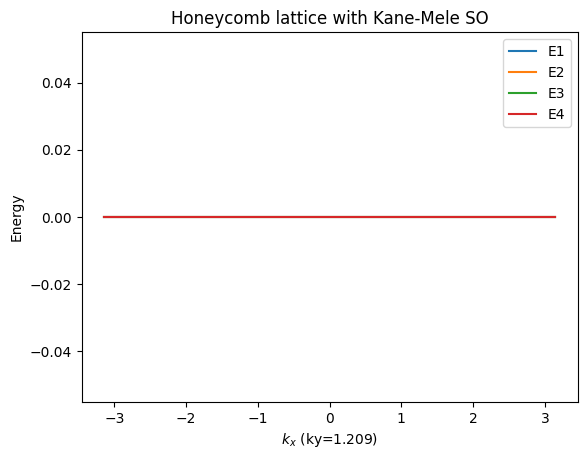

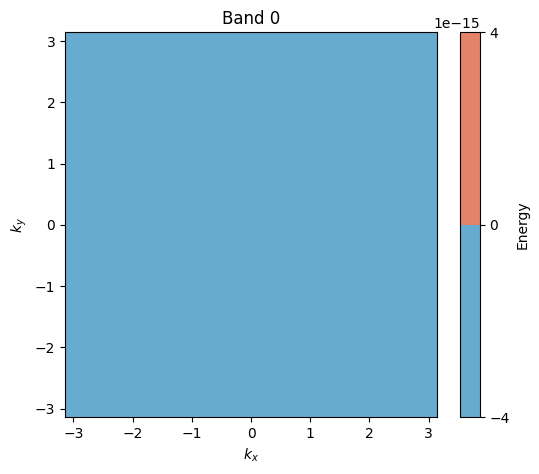

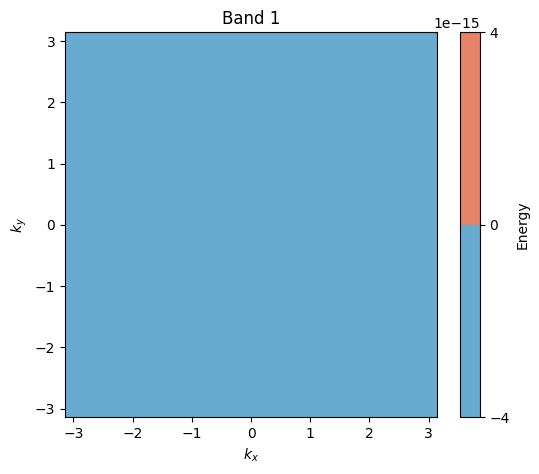

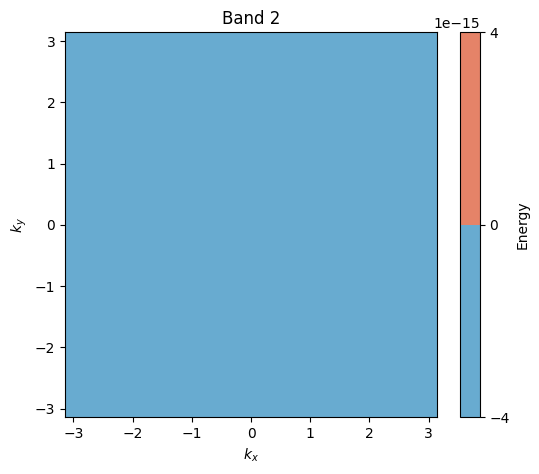

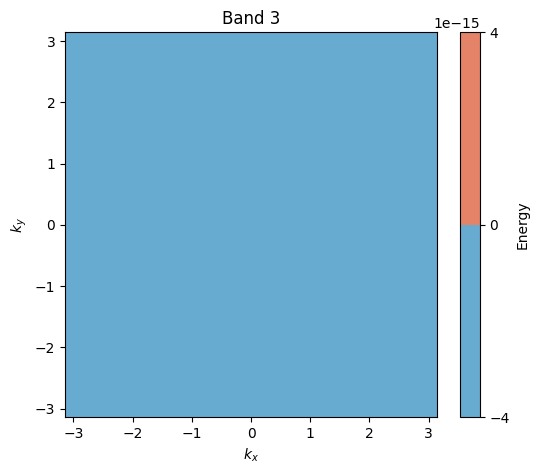

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def H_of_k_spin(kvec, cell_positions, hoppings_nn, hoppings_nnn, lambda_so=0.0):
    """
    Returns 4x4 Hamiltonian (2 sublattices x 2 spins)
    - NN hoppings: spin-independent
    - NNN hoppings: Kane-Mele intrinsic SO, i*lambda*nu*s_z
    """
    N = len(cell_positions)
    H = np.zeros((2*N, 2*N), dtype=complex)  # double size for spin

    # NN hoppings (spin-independent)
    for (i, j, Rvec, t) in hoppings_nn: #i = end orbital, j = start orbital, 0 = A, 1 = B
        delta = cell_positions[j] - cell_positions[i] + np.array(Rvec)
        phase = np.exp(1j * np.dot(kvec, delta))
        for s in range(2):  # spin up = 0, down = 1
            H[i + s*N, j + s*N] += t * phase #So each index is: 0 = (A, up), 1 = (B, up), 2 = (A, down), 3 = (B, down)

    # NNN hoppings (spin-dependent Kane-Mele)
    for (i, j, Rvec, nu, t2) in hoppings_nnn: #Here, nu is the value (+-1) of the sigma_z (dont read into the sigma_z too much it's just a label for +1 and -1)
        delta = cell_positions[j] - cell_positions[i] + np.array(Rvec)
        phase = np.exp(1j * np.dot(kvec, delta))
        # Spin up
        H[i, j] += 1j * lambda_so * nu * phase
        # Spin down
        H[i + N, j + N] += -1j * lambda_so * nu * phase

    return H


def honeycomb_kane_mele(Nk=200, t=-1.0, t2 = -0.03, lambda_so=0.1):
    # Primitive vectors
    a1 = np.array([0.5, np.sqrt(3)/2])
    a2 = np.array([0.5, -np.sqrt(3)/2])

    # Sublattice positions
    rA = np.array([0.0, 0.0])
    rB = np.array([-1.0, 0.0])
    cell_pos = [rA, rB]

    # Nearest-neighbor vectors
    delta1 = np.array([-1.0, 0.0])
    delta2 = np.array([0.5, -np.sqrt(3)/2])
    delta3 = np.array([0.5,  np.sqrt(3)/2])

    hoppings_nn = []
    for d in (delta1, delta2, delta3):
        Rvec = d - (rB - rA)
        hoppings_nn.append((0, 1, Rvec, t))

    # NNN hoppings with Kane-Mele sign ν
    # A sublattice
    nnnA = [(delta2 - delta1,+1), (delta1 - delta2,+1), (delta2 - delta3,+1),
            (delta3 - delta2,+1), (delta1 - delta3,+1), (delta3 - delta1,+1)]

    # B sublattice
    nnnB = [(-v, -nu) for (v, nu) in nnnA]
    hoppings_nnn = []
    for v, nu in nnnA:
        hoppings_nnn.append((0, 0, v, nu, t2))
    for v, nu in nnnB:
        hoppings_nnn.append((1, 1, v, nu, t2))

    # k-grid
    k_lim = np.pi
    kxs = np.linspace(-k_lim, k_lim, Nk)
    kys = np.linspace(-k_lim, k_lim, Nk)
    energies = np.zeros((Nk, Nk, 4))  # 4 bands

    for ix, kx in enumerate(kxs):
        for iy, ky in enumerate(kys):
            H = H_of_k_spin(np.array([kx, ky]), cell_pos, hoppings_nn, hoppings_nnn, lambda_so)
            evals = np.linalg.eigvalsh(H)
            energies[ix, iy, :] = evals.real

    # 1D cut along kx, ky = K_y
    bottom_band, lower_band, upper_band, top_band = [], [], [], []
    kcut = np.linspace(-k_lim, k_lim, Nk)
    cut_val = (2*np.pi)/(3*np.sqrt(3))
    for kx in kcut:
        H = H_of_k_spin(np.array([kx, cut_val]), cell_pos, hoppings_nn, hoppings_nnn, lambda_so)
        evals = np.linalg.eigvalsh(H)
        bottom_band.append(evals[0].real)
        lower_band.append(evals[1].real)
        upper_band.append(evals[2].real)
        top_band.append(evals[3].real)

    plt.figure()
    plt.plot(kcut, bottom_band, label="E1")
    plt.plot(kcut, lower_band, label="E2")
    plt.plot(kcut, upper_band, label="E3")
    plt.plot(kcut, top_band, label= "E4")
    plt.xlabel(f'$k_x$ (ky={cut_val:.3f})')
    plt.ylabel('Energy')
    plt.title('Honeycomb lattice with Kane-Mele SO')
    plt.legend()
    plt.show()

    # 2D contour plots
    KX, KY = np.meshgrid(kxs, kys, indexing='ij')
    for b in [0, 1, 2, 3]:
        plt.figure(figsize=(6,5))
        plt.contourf(KX, KY, energies[:,:,b], levels=50, cmap='RdBu_r')
        plt.colorbar(label='Energy')
        plt.title(f'Band {b}')
        plt.xlabel(r'$k_x$')
        plt.ylabel(r'$k_y$')
        plt.show()


# Run the Kane-Mele band structure
honeycomb_kane_mele(Nk=200, t=-1.0, lambda_so= 3)

So how do we interpret these bands? If we identify $m = \lambda_{SO} \tau s_z$ we see that we've got the effective mass band spectra, with:
$$E_\pm(q) = \pm \sqrt{(\hbar v_F q)^2 + m^2}$$

Near the dirac points, after which our approximation breaks down. We see now the gap between the two spectra is $2|\lambda_{SO} \tau s_z|$. So the effective mass of a spin up electron is opposite to that of a spin down electron, likewise the mass term flips if we're in K vs K'.

# Comparison with the Haldane model and ties to the QHE

The Haldane model is another NNN model which doesn't include a spin dependent or K,K' term, it just has the $\sigma_z$ term for A-B to reflect the difference in chirality between the two sublattices. This model is basically two Haldane models, one for each spin. Though this doesn't have much of an impact on the energy spectra (degenerate in spin), it does affect the Hall conductivity.

While the Haldane model has a non-zero charge chern number (leading to a net current about the edge of the lattice) the Hane-Mele model has a charge chern number of 0 and a non-zero spin chern number, leading to no net Hall conductivity but each sign of spin circulates in the opposite direction.